<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day1_Introduction_to_DL_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**There is not a lot of code required, but we are going to step over it slowly so that you will know how to create your own models in the future.**

**1. Load Data.**

In [12]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# load the dataset
path = '/content/drive/My Drive/data/pima-indians-diabetes.data.csv'
dataset = loadtxt(path, delimiter=',')
# split into input (X) and output (y) variables

In [14]:
X = dataset[:,0:8]
y = dataset[:,8]

**2. Define Keras Model.**

In [15]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


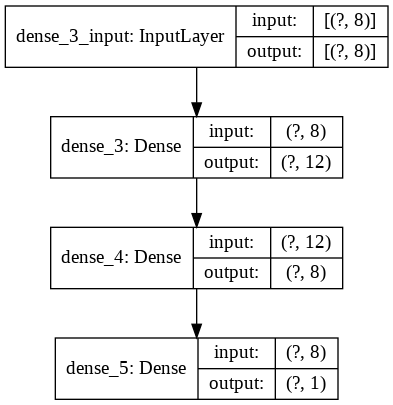

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/data/my_model_plot.png', show_shapes=True, show_layer_names=True)

**3. Compile Keras Model.**

In [20]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**4. Fit Keras Model.**

In [ ]:
# fit the keras model on the dataset
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=2)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


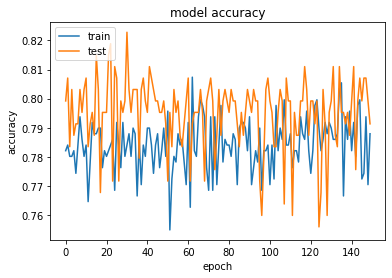

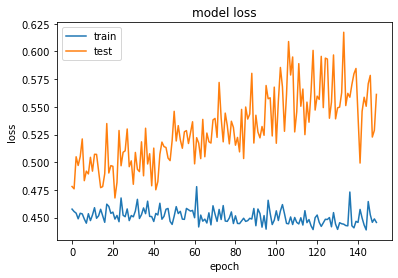

In [37]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**5. Evaluate Keras Model.**

In [22]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7656
Accuracy: 76.56


**6. Make Predictions.**

In [28]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [29]:
# make class predictions with the model
predictions = model.predict_classes(X)
# print(predictions)

**Realize model design requirements:**
1. *Tune the Model*. Change the configuration of the model or training process and see if you can improve the performance of the model, e.g. achieve better than 76% accuracy.
2. *Save the Model*. Save the model to file, then load it later and use it to make predictions.
3. *Separate Train and Test Datasets*. Split the loaded dataset into a train and test set (split based on rows) and use one set to train the model and the other set to estimate the performance of the model on new data.
4. *Learn a New Dataset*. Use a different tabular dataset.
5. *Use Functional API*. The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.